# Cooling Degree Days in the US


## 1. Introduction

Cooling degree days (CDD) is a temperature index that is used to monitor the climate in the US [see US Global Change Research Program](https://www.globalchange.gov/browse/indicators/indicator-heating-and-cooling-degree-days).
The EPA has reported that CDDs have significantly increased in the past decades ([see the EPA online summary report](https://www3.epa.gov/climatechange/science/indicators/health-society/heating-cooling2.html), and the [technical description](https://www.epa.gov/sites/production/files/2016-08/documents/heating-cooling_documentation.pdf)). However, spatial trends vary and the figures on the EPA web pages, for example, also show regions (states) in which no trend or slight negative trends are found.

The purpose of this research project ...



This prepared Notebook is the starting point for the trend analysis of the continental US.
Here we make use of a gridded temperature data set developed by scientists at NCAR [[Newman et al.(2015)](https://dx.doi.org/10.1175/JHM-D-15-0026.1)].

The data cover the continental U.S. (CONUS) with a resolution of 1/8 degree, and the time range is 1981-2016. 

The version of the source data product is an updated version of the orginally published data set (Newman, personal communication, 2018). 




In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pylab as plt
import xarray as xr
from scipy import stats

## Reading data from a NetCDF file

### What is NetCDF format and who uses it? 
NetCDF is a common data format used in atmospheric, ocean and climate sciences. Many model data output is 
distributed in NetCDF format. You also find remote sensing products in NetCDF format. The format is platform independent, and it is self-describing. That is all 

In [5]:
# PATH to the local NetCDF file
# and NetCDF file name
data_path="/home11/staff/timm/Public/Data/"


files = [data_path+f"conus_tmean_cdd65_{year}.nc" for year in range(1980, 2016)]

print("open the all the data files "+files[0]+"..."+files[-1] )
try:
    nc=xr.open_mfdataset(files,coords=('time',),chunks={'time':1}) # opens the NetCDF
    failed=False
except:
    print("failed")
    failed=True
if not failed:
    
    print(nc)
    
if True:
     # ROSE is the NetCDF variable name for the topography data
    lon=nc['lon'] # NetCDF variable name for the longitude
    lat=nc['lat'] # NetCDF variable name for the latitude
    lon2d, lat2d =np.meshgrid(lon, lat) # takes lon and lat data and makes a full 2-d grid filled with lat and lon values
    cdd=nc['cdd']
    print("found longitudes, latitudes, and topography data")
    print("shape of array variable cdd: ",np.shape(cdd))
    print("shape of array variable lon2d : ",np.shape(lon2d))
    print("shape of array variable lat2d : ",np.shape(lat2d))
    print("------------------------------------------------")
    print("shape of array variable lat   : ", np.shape(lat))
    print("shape of array variable lon   : ", np.shape(lon))
    
    print(80*'=')

    

open the all the data files /home11/staff/timm/Public/Data/conus_tmean_cdd65_1980.nc.../home11/staff/timm/Public/Data/conus_tmean_cdd65_2015.nc
<xarray.Dataset>
Dimensions:  (lat: 224, lon: 464, time: 36)
Coordinates:
  * lat      (lat) float64 25.12 25.25 25.38 25.5 ... 52.62 52.75 52.88 53.0
  * lon      (lon) float64 -124.9 -124.8 -124.6 -124.5 ... -67.25 -67.12 -67.0
  * time     (time) datetime64[ns] 1980-01-01 1981-01-01 ... 2015-01-01
Data variables:
    cdd      (time, lat, lon) float32 dask.array<shape=(36, 224, 464), chunksize=(1, 224, 464)>
Attributes:
    history:  created 2019-04-30 19:33
    info:     input data file: /network/rit/lab/elisontimmlab_rit/DATA/USGRID...
found longitudes, latitudes, and topography data
shape of array variable cdd:  (36, 224, 464)
shape of array variable lon2d :  (224, 464)
shape of array variable lat2d :  (224, 464)
------------------------------------------------
shape of array variable lat   :  (224,)
shape of array variable lon   :  (464,)

In [4]:
# Load the elevation map data for this data set's grid resolution

data_path="/home11/staff/timm/Public/Data/"


file = data_path+f"conus_eigth_elevation.nc"
print("open the elevation "+file)
try:
    nc_elev=xr.open_dataset(file) # opens the NetCDF
    failed=False
except:
    print("failed")
    failed=True
if not failed:
    print(nc_elev)

    
elev=nc_elev['elevation'].values # copied to numpy array
print(np.shape(elev))
nc_elev.close()

open the elevation /home11/staff/timm/Public/Data/conus_eigth_elevation.nc
<xarray.Dataset>
Dimensions:    (lat: 224, lon: 464)
Coordinates:
  * lon        (lon) float64 -124.9 -124.8 -124.6 -124.5 ... -67.25 -67.12 -67.0
  * lat        (lat) float64 25.12 25.25 25.38 25.5 ... 52.62 52.75 52.88 53.0
Data variables:
    elevation  (lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 1.7.1 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Tue Apr 30 16:36:37 2019: cdo -selvar,elevation -seltimeste...
    CDO:          Climate Data Operators version 1.7.1 (http://mpimet.mpg.de/...
(224, 464)


# 1 Plotting 2-dim data

## Variables that contain our data:

- cdd: a 3-dimensional array with cooling degree days (year,lat,lon)
- lon2d : a 2-dimensional array with longitude grid coordinates (matches dimension of variable topo)
- lat2d : a 2-dimensional array with latitude grid coordinates (matches dimension of variable topo)

- lon and lat: 1-dimensional arrays with the coordinates.


## User defined variables for plot customization

In [6]:
# plot customization
# lev: levels for color shading
# cm:  colormap for fill colors
lev=np.arange(0,4000,200) # 1-d numpy array 
cm=plt.get_cmap('gray')
xlabel="Longitude"
ylabel="Latitude"
title="CDD"
test=cdd.isel(time=0)
print(test)

<xarray.DataArray 'cdd' (lat: 224, lon: 464)>
dask.array<shape=(224, 464), dtype=float32, chunksize=(224, 464)>
Coordinates:
  * lat      (lat) float64 25.12 25.25 25.38 25.5 ... 52.62 52.75 52.88 53.0
  * lon      (lon) float64 -124.9 -124.8 -124.6 -124.5 ... -67.25 -67.12 -67.0
    time     datetime64[ns] 1980-01-01
Attributes:
    long_name:  cooling degree days
    units:      Fahrenheit degree-day
    info:       base temperature 65F


## 1.1 Contour plot

We make use of the function plt.contour. 

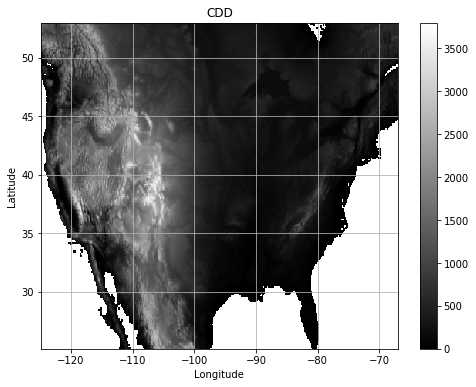

In [7]:
# a map with contour lines contour plot
plt.figure(figsize=[8,6])
plt.pcolormesh(lon2d,lat2d,elev,cmap=cm,vmin=np.min(lev),vmax=np.max(lev))# origin='lower') # levels=lev
plt.colorbar()
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)

plt.grid()
plt.show()





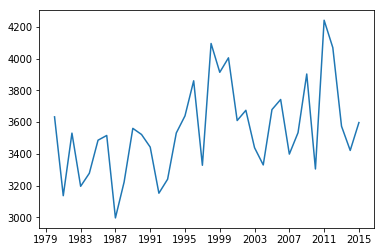

In [8]:
# Time series plot for one grid location
# near Albany: lat, lon  = -42.6526,  -73.7562
sellat, sellon= 42.62, -73.75 
# Note: xarray data arrays have the conveniet method to find the nearest value
# in an array
#lat.sel(lat=sellat,method='nearest')
#lon.sel(lon=sellon,method='nearest')
### test=cdd.sel({'lat':sellat})


ilat,ilon=1,200 # somewhere in the middle of the lat lon array
plt.plot(nc['time'],cdd.values[:,ilat,ilon])
plt.show()



## References: 
- [ETOPO high resolution data set](https://maps.ngdc.noaa.gov/viewers/wcs-client/)
- [Unidata NetCDF documentation](https://www.unidata.ucar.edu/software/netcdf/docs/index.html)
- [Color maps in matplotlib](https://matplotlib.org/examples/color/colormaps_reference.html)

In [9]:
x=np.arange(1981,2016+1,1)
k=0
nlat=np.size(lat)
nlon=np.size(lon)
a=np.zeros(shape=[nlat,nlon])+np.NAN
b=np.zeros(shape=[nlat,nlon])+np.NAN
r=np.zeros(shape=[nlat,nlon])+np.NAN
p=np.zeros(shape=[nlat,nlon])+np.NAN
data=cdd.values # this makes it faster for calculation, but loads all data in memory

print ("work with all data in memory: ",np.size(data)*4)
for j in range(nlat):
    for i in range (nlon):
        if  not any(np.isnan(data[:,j,i])):
            b[j,i],a[j,i],r[j,i],p[j,i],resid=stats.linregress(x,data[:,j,i])
    k=k+nlon
    print('percent done: %6.2f' % (k/(nlat*nlon)*100))


work with all data in memory:  14966784
percent done:   0.45
percent done:   0.89
percent done:   1.34
percent done:   1.79
percent done:   2.23
percent done:   2.68
percent done:   3.12
percent done:   3.57
percent done:   4.02
percent done:   4.46
percent done:   4.91
percent done:   5.36
percent done:   5.80
percent done:   6.25
percent done:   6.70
percent done:   7.14
percent done:   7.59
percent done:   8.04
percent done:   8.48
percent done:   8.93
percent done:   9.38
percent done:   9.82
percent done:  10.27
percent done:  10.71
percent done:  11.16
percent done:  11.61
percent done:  12.05
percent done:  12.50
percent done:  12.95
percent done:  13.39
percent done:  13.84
percent done:  14.29
percent done:  14.73
percent done:  15.18
percent done:  15.62
percent done:  16.07
percent done:  16.52
percent done:  16.96
percent done:  17.41
percent done:  17.86
percent done:  18.30
percent done:  18.75
percent done:  19.20
percent done:  19.64
percent done:  20.09
percent done:  

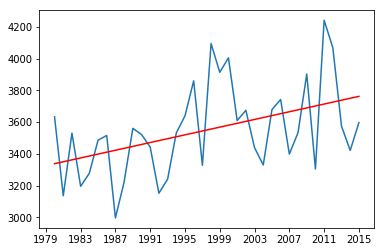

In [10]:
ilat,ilon=1,200 # somewhere in the middle of the lat lon array

plt.plot(nc['time'],data[:,ilat,ilon])
# use same x predictor data (years) as before
x=np.arange(1981,2016+1,1)
plt.plot(nc['time'],x*b[ilat,ilon]+a[ilat,ilon],color='red')
plt.show()

In [11]:
a[ilat,ilon]

-20678.41648114179

In [12]:
b[ilat,ilon]

12.123252462144066

/kt11/ktyle/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


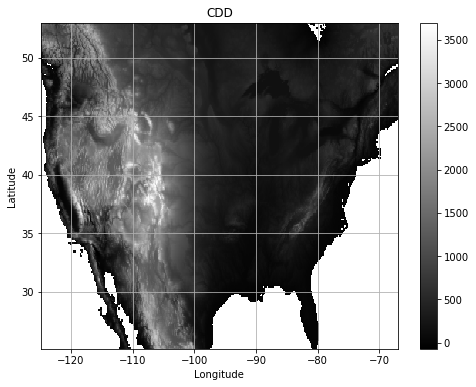

In [27]:
plt.figure(figsize=[8,6])
plt.pcolormesh(lon2d,lat2d,elev,cmap=cm)
plt.colorbar()
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)

plt.grid()
fig.show()

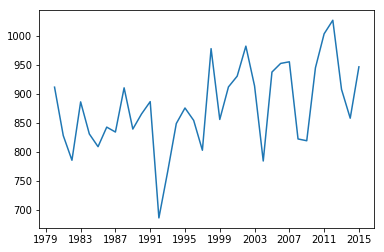

In [28]:
# averaged over US (equal weights for all grid cells)
cdd_conus=np.mean(cdd,axis=[1,2]) 
plt.plot(nc['time'],cdd_conus)

(array([7.0000e+00, 1.5000e+01, 1.0000e+02, 2.9500e+02, 1.1100e+03,
        3.7120e+03, 1.3075e+04, 1.9668e+04, 1.1213e+04, 7.5410e+03,
        5.5620e+03, 4.2060e+03, 3.1050e+03, 2.5850e+03, 2.0410e+03,
        1.7000e+03, 1.0660e+03, 6.0900e+02, 4.0100e+02, 2.6500e+02,
        2.1500e+02, 1.5200e+02, 1.4000e+02, 1.2100e+02, 1.0600e+02,
        1.0900e+02, 7.4000e+01, 3.1000e+01, 2.2000e+01, 2.4000e+01]),
 array([-8.79358518, -7.4796973 , -6.16580943, -4.85192155, -3.53803368,
        -2.2241458 , -0.91025792,  0.40362995,  1.71751783,  3.03140571,
         4.34529358,  5.65918146,  6.97306934,  8.28695721,  9.60084509,
        10.91473297, 12.22862084, 13.54250872, 14.8563966 , 16.17028447,
        17.48417235, 18.79806023, 20.1119481 , 21.42583598, 22.73972386,
        24.05361173, 25.36749961, 26.68138749, 27.99527536, 29.30916324,
        30.62305112]),
 <a list of 30 Patch objects>)

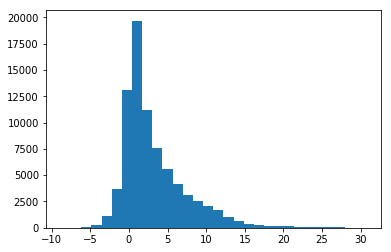

In [29]:
isvalid=np.logical_not(np.isnan(p))
plt.hist(b[isvalid],bins=30)

In [30]:
# zoom into NE US
# copy and paste from 2018 notebooks

/kt11/ktyle/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


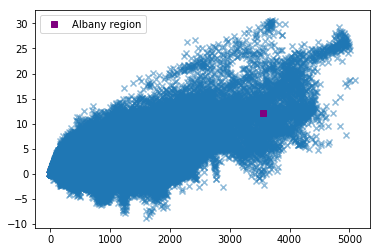

In [36]:
# plt slope as function of mean cdd
cddmean=np.nanmean(cdd,axis=0)
plt.scatter(cddmean[isvalid],b[isvalid],marker='x',alpha=0.5)
   

# draw point for Albany
plt.plot(cddmean[ilat,ilon],b[ilat,ilon],'s',color='purple',label="Albany region")
plt.legend()
plt.show()     